# Parcial 2: Estadística en Ciencia de Datos

**Alejandro Velásquez Arango**

EAFIT 2022

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

## Punto 1

In [2]:
df1 = pd.read_excel('./../datos/Paises2.xlsx', index_col='Pais')
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Pais,,,,,,,,,,,
Albania,1.0,30,41,2199,3903,12,94,53,0.0,341,1.2
Angola,3.0,124,46,4422,955,6,57,19,0.7,89,0.5
ArabiaSaudi,4.3,21,13,133540,91019,96,497,1,0.0,4566,13.1
Argelia,2.5,34,24,44609,19883,42,180,2,0.8,906,3.0
Argentina,1.3,22,31,278431,65962,160,1043,22,0.1,1504,3.5
Australia,1.4,6,43,337909,167155,510,933,19,0.0,5341,15.3
Austria,0.6,6,41,216547,53259,465,304,47,-0.4,3301,7.2
Bangladesh,2.0,79,42,28599,9891,2,220,6,4.1,64,0.2
Bélgica,0.3,8,40,250710,72236,457,917,20,-0.3,5120,10.1


In [3]:
rows, cols = df1.shape

### Estandarizar los datos

In [4]:
X_stand = StandardScaler().fit_transform(df1)

In [5]:
X_stand[0]

array([-0.64955357, -0.26451146,  0.20159678, -0.78056703, -0.66004874,
       -0.84002104, -0.81992424,  0.7226464 , -0.39223227, -0.77136178,
       -0.83385733])

### Cálculo de matriz de distancias con norma usual sobre los datos estandarizados

In [6]:
distance_matrix = np.zeros((rows,rows))
for i in range(0, distance_matrix.shape[0]):
    for j in range(0, distance_matrix.shape[1]):
        distance_matrix[i][j] = euclidean(X_stand[i],X_stand[j])
D = pd.DataFrame(distance_matrix, index=df1.index, columns=df1.index)
D

Pais,Albania,Angola,ArabiaSaudi,Argelia,Argentina,Australia,Austria,Bangladesh,Bélgica,Benin,Bielrorrusia,Bolivia,Brasil,Bulgaria,Camerún,Canadá,Colombia,Congo,Corea del Norte,Corea del Sur
Pais,,,,,,,,,,,,,,,,,,,,
Albania,0.000000,3.752513,6.030931,3.527386,3.309341,5.489904,3.312303,4.901438,4.607470,3.039147,2.741305,2.101209,3.783482,4.961830,2.011646,7.949236,1.288551,2.577407,2.709219,3.904275
Angola,3.752513,0.000000,6.268867,3.896872,4.757918,6.577615,5.535951,3.789780,6.164894,1.621430,4.808254,2.448090,5.138529,6.593824,2.508673,9.102662,3.680783,2.188151,4.802033,5.974873
ArabiaSaudi,6.030931,6.268867,0.000000,3.567421,4.469589,5.190911,5.661563,6.851553,5.326790,6.493453,5.857646,5.433299,6.172855,7.164312,5.330601,7.584069,5.293859,6.007697,5.859170,6.008146
Argelia,3.527386,3.896872,3.567421,0.000000,2.929080,5.435038,4.557730,4.185382,4.858081,4.064277,4.326536,2.822211,4.726401,6.044946,2.799295,8.363009,2.919532,3.958317,4.738049,5.163171
Argentina,3.309341,4.757918,4.469589,2.929080,0.000000,3.824587,3.120367,5.213299,3.012241,4.669275,3.431028,3.430620,3.584200,4.054756,3.610613,6.276066,2.817597,4.390937,3.757117,3.171085
Australia,5.489904,6.577615,5.190911,5.435038,3.824587,0.000000,2.946859,6.994499,1.709158,6.472718,3.584179,5.755907,5.330778,4.051269,5.920155,3.947964,5.023523,6.238834,4.596372,3.196468
Austria,3.312303,5.535951,5.661563,4.557730,3.120367,2.946859,0.000000,6.326376,2.105569,5.112193,2.238666,4.217477,4.082009,4.014800,4.296617,5.577810,3.104766,4.662920,3.367440,1.905280
Bangladesh,4.901438,3.789780,6.851553,4.185382,5.213299,6.994499,6.326376,0.000000,6.626921,3.544790,5.745261,3.468933,5.771028,6.968986,4.051590,9.793485,4.371223,4.680734,5.908987,6.531700
Bélgica,4.607470,6.164894,5.326790,4.858081,3.012241,1.709158,2.105569,6.626921,0.000000,6.078028,2.845118,5.163082,5.070904,3.517505,5.378012,4.760232,4.354420,5.803829,4.297245,2.881179


### Cálculo de los autovectores y autovalores de la matriz de covarianzas de la matriz de distancias estandarizada

In [7]:
D_stand = StandardScaler().fit_transform(distance_matrix)
covariance = np.cov(D_stand)
eig_values, eig_vectors = la.eig(covariance)
eig_values.round(2)

array([ 9.15,  2.17,  1.42,  1.02,  0.64,  0.46,  0.28,  0.21,  0.19,
        0.14,  0.12,  0.09,  0.05,  0.05, -0.  ,  0.03,  0.03,  0.01,
        0.02,  0.02])

In [8]:
eig_vectors[0:2][:].round(2)

array([[-0.12,  0.25,  0.14,  0.07,  0.07,  0.14,  0.  ,  0.36, -0.08,
         0.08, -0.11,  0.27,  0.52,  0.24,  0.22,  0.14, -0.35, -0.02,
        -0.29, -0.21],
       [-0.28, -0.08, -0.27,  0.1 , -0.01, -0.14,  0.25, -0.33, -0.12,
         0.09,  0.26, -0.06,  0.46,  0.19,  0.22, -0.11,  0.39, -0.02,
        -0.16,  0.24]])

### Varianza explicada

In [9]:
eig_values[0]/eig_values.sum(), eig_values[1]/eig_values.sum()

(0.5680757872686832, 0.13487130419294746)

In [10]:
eig_values[0]/eig_values.sum() + eig_values[1]/eig_values.sum()

0.7029470914616307

### Cálculo de las dos primeras coordenadas principales

In [11]:
new_df = []
for index, row in enumerate(D_stand):
    new_df.append([np.dot(eig_vectors[:,0], row), np.dot(eig_vectors[:,1], row),])
new_df = pd.DataFrame(np.array(new_df), columns="Z1 Z2".split(), index=df1.index)
new_df

,Z1,Z2
Pais,,
Albania,1.557898,-1.605406
Angola,3.752294,0.435125
ArabiaSaudi,-0.180428,4.366517
Argelia,1.822185,2.180006
Argentina,-1.114068,0.583447
Australia,-4.329564,0.922385
Austria,-2.794215,-1.128194
Bangladesh,3.335146,1.306430
Bélgica,-4.025695,0.299815


Se puede identificar un outlier alrededor de $(0,\; 4)$, que corresponde al pais de Arabia Saudita

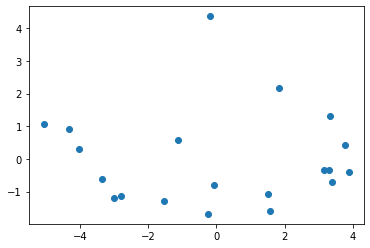

In [12]:
plt.plot(new_df.Z1, new_df.Z2, 'o')
plt.show()

El país más cercano a Colombia es Albania, según la matriz de distancias:

In [13]:
distance_matrix = np.zeros((rows,rows))
for i in range(0, distance_matrix.shape[0]):
    for j in range(0, distance_matrix.shape[1]):
        distance_matrix[i][j] = euclidean(new_df.to_numpy()[i],new_df.to_numpy()[j])
D = pd.DataFrame(distance_matrix, index=df1.index, columns=df1.index)

In [14]:
D.Colombia.sort_values()[0:2]

Pais
Colombia    0.000000
Albania     0.540543
Name: Colombia, dtype: float64

## Punto 2

Se tiene la matriz de distancia
$$
\begin{bmatrix}
0 & 3 \\
3 & 0 
\end{bmatrix}
$$

Como la matriz tiene dimensión $2\times2$, la matriz de datos debe tener solo 2 registros. El número de columnas puede ser cualquiera, con tal de que la distancia entre los registros sea $3$ ya que la matriz de distancia es simétrica. Se debe cumplir entonces
$$
||X^{(1)}-X^{(2)}||_2=3
$$
Con esto en cuenta, una matriz en particular que cumple esto es
$$
\begin{bmatrix}
0 & 0 \\
3 & 0 
\end{bmatrix}
$$


In [15]:
X = np.array([
    [0, 0],
    [3, 0]
])
distance_matrix = np.zeros((2,2))
for i in range(0, distance_matrix.shape[0]):
    for j in range(0, distance_matrix.shape[1]):
        distance_matrix[i][j] = euclidean(X[i],X[j])
distance_matrix

array([[0., 3.],
       [3., 0.]])

## Punto 3

In [16]:
df3 = pd.read_csv('./../datos/Clientes_D1.csv').drop('IDCliente', axis=1)
df3

,Sexo,Edad,IngresoDiario (miles),PuntajeGastos(1-100)
0,Female,47,120,16
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
185,Male,30,99,97
186,Female,54,101,24
187,Male,28,101,68
188,Female,41,103,17


Cambiar a variable binaria la variable categórica Sexo

In [17]:
df3 = pd.get_dummies(df3, drop_first=True)
df3

,Edad,IngresoDiario (miles),PuntajeGastos(1-100),Sexo_Male
0,47,120,16,0
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
185,30,99,97,1
186,54,101,24,0
187,28,101,68,1
188,41,103,17,0


In [18]:
X = MinMaxScaler().fit_transform(df3)

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=2, random_state=42)

In [20]:
df3['Label'] = kmeans.labels_
df3

,Edad,IngresoDiario (miles),PuntajeGastos(1-100),Sexo_Male,Label
0,47,120,16,0,1
1,21,15,81,1,0
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1
...,...,...,...,...,...
185,30,99,97,1,0
186,54,101,24,0,1
187,28,101,68,1,0
188,41,103,17,0,1


La persona del primer registro pertence al cluster $1$

### Número $k$ de grupos óptimo

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


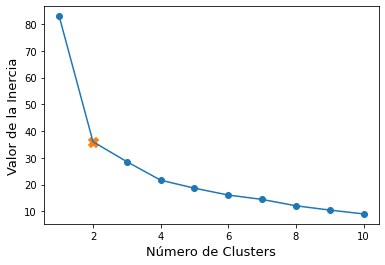

In [21]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(2, inertia_list[1], marker='X', s=100)
plt.xlabel("Número de Clusters", size=13)
plt.ylabel("Valor de la Inercia", size=13)
plt.show()

Por el método del codo, un valor adecuado para el número de grupos es 2

In [22]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df3)

KMeans(n_clusters=2, random_state=42)

In [23]:
df3['Label'] = kmeans.labels_
df3

,Edad,IngresoDiario (miles),PuntajeGastos(1-100),Sexo_Male,Label
0,47,120,16,0,0
1,21,15,81,1,1
2,20,16,6,0,0
3,23,16,77,0,1
4,31,17,40,0,0
...,...,...,...,...,...
185,30,99,97,1,1
186,54,101,24,0,0
187,28,101,68,1,1
188,41,103,17,0,0


La persona del primer registro pertenece al cluster $0$ cuando se definen 2 grupos 

## Punto 4
Demostrar que la esparanza condicional $E[Y|X]$ es la solución al problema de minimización
$$
f(x) = \argmin_c E((Y-c)^2|X=x)
$$

Diferenciando $f$ respecto $c$:

$$
\begin{align}\frac{\partial f}{\partial c}&=\frac{\partial}{\partial c}\left(E[(Y-c)^2|X=x]\right)\\
\frac{\partial f}{\partial c}&=\frac{\partial}{\partial c}\left(E[Y^2|X=x]-2cE[Y|X=x]+c^2\right)\\
\frac{\partial f}{\partial c}&=-2E[Y|X=x]+2c=0\end{align}
$$

Lo que entrega
$$
c = E[Y|X=x]
$$

Esta $c$ minimiza $f$ porque la segunda derivada es mayor a $0$.